In [4]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import importlib
importlib.reload(gene_matching_functions)
import gene_matching_functions
from gene_matching_functions import *

In [5]:
data_refer = load_data_refer()

In [6]:
infect_range_m = 3
infect_range_M = 20
infect_range_z = 7
Neurons_all = data_refer.index.values

Build the dataset

In [10]:
file_list = ['7', '11', '20', '38', '55', '56', '62', '64', '70', '76']
file_path = 'data/' # Path of data folder

data_set = {}
for f in file_list:
    data_set[f] = data_init_adjust(file_path=file_path, file_name=f, refer_data=data_refer)

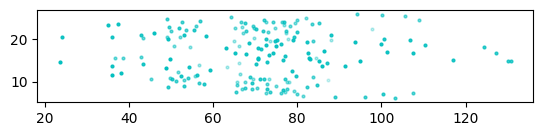

In [82]:
visualize_2d(data_refer)

In [ ]:
gene_len = pd.DataFrame(pd.read_csv('data/reporterlist_length.csv'))
gene_len = gene_len.set_index('gene_symbol')
gene_len = gene_len.dropna(axis=0)
gene_len = gene_len.to_dict()['gene_length']

### View the distribution of all NeuroPAL data

In [33]:
data_all = pd.concat([data_set[f] for f in data_set.keys()], axis=0)

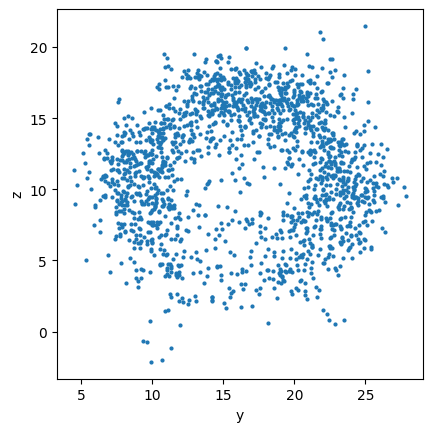

In [12]:
fig, ax = plt.subplots(1,1)
visualize_2d(data_all, ax=ax, axis=['y','z'])
ax.set_xlabel('y')
ax.set_ylabel('z')
plt.show()

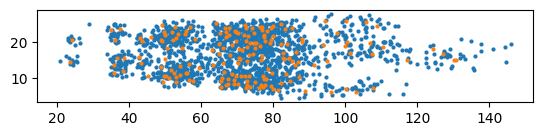

In [72]:
visualize_2d(data_all, data_refer[['x','y','z']].values)

# Matching

Load gene expression data

In [12]:
expression_all = pd.DataFrame(pd.read_csv('data/cegenelist_head_expression_filter.csv')) # Change your path here
expression_all.insert(0, '0', 0)
expression_all.insert(0, '1', 1)
expression_all = expression_all.T.drop_duplicates().T.drop(columns=['0', '1'])
expression_all = expression_all.drop(columns=['Neuron class', 'Neurotransmitter identity'])
expression_all.index = expression_all['Neuron']
expression_all = expression_all.drop('Neuron', axis='columns')

Select a test data

In [ ]:
data_test_name = '7'
# Combined other data as a labeled training dataset
data_map = pd.concat([data_set[f] for f in file_list[:7] if f != data_test_name], axis=0)
data_map = pd.concat([data_map, data_refer], axis=0)

Try matching with only spatial information (without any gene expression information)

In [ ]:
output = match_id(
    data_map, 
    data_set[data_test_name], 
    gene_list=None,
    )
output

Try matching with all the genes

In [ ]:
output = match_id(
    data_map, 
    data_set[data_test_name], 
    gene_list=expression_all.columns.tolist(),
    )
output

Try matching with a given gene list

In [76]:
gene_list_test = ['cam-1', 'unc-7', 'unc-9', 'ace-3', 'ser-2', 'ast-1', 'inx-19']

In [ ]:
match_id(
    data_map, 
    data_set[data_test_name], 
    gene_list=gene_list_test, 
    )

Change the parameters

In [ ]:
match_id(
    data_map, 
    data_set[data_test_name], 
    gene_list=gene_list_test, 
    maxtime01 = 0,
    maxtime10 = 0, # which means the experimental gene expression must match its theoretic expression
    )

Add some other features

Here we take the cell density of four directions into consideration

In [ ]:
fea_columns = ['++', '-+', '+-', '--']

data_refer[fea_columns] = density_fea(data_refer, infect_range_m, infect_range_M, infect_range_z)

for f in file_list:
    data_set[f][fea_columns] = density_fea(data_set[f], infect_range_m, infect_range_M, infect_range_z)

In [ ]:
match_id(
    data_map, 
    data_set[data_test_name], 
    gene_list=gene_list_test, 
    w=3, # weights of the additional features
    fea_columns=fea_columns, 
    xyz_weight=[1,1,1], 
    gene_weight=100)

View the shift between a neuron's true location and its predicted location

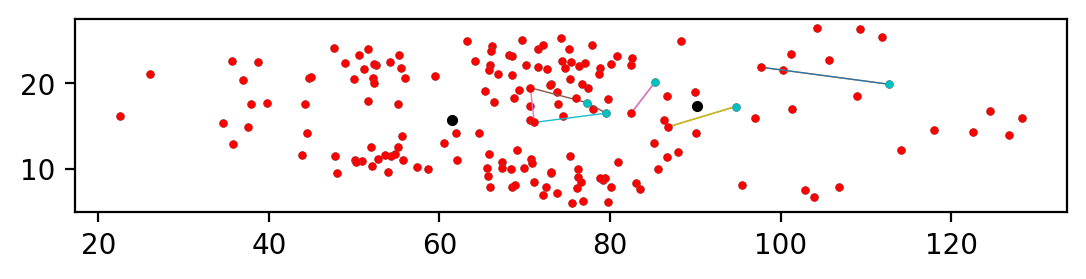

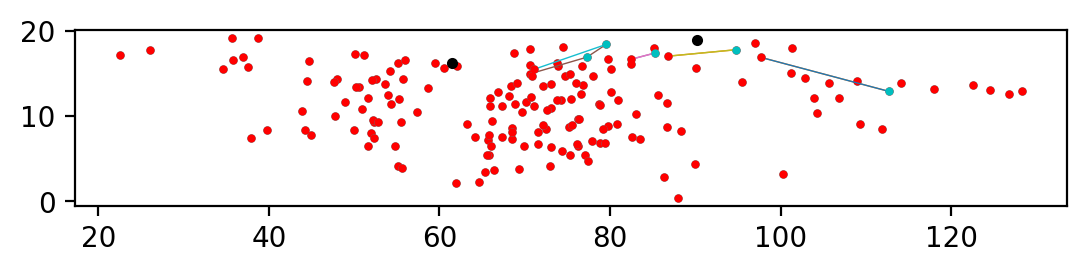

In [425]:
data_out = data_set[data_test_name].iloc[output[2][1]].copy()
data_out.index = output[2][0]

view_shift(data_set[data_test_name], data_out, axis=[0,1])
view_shift(data_set[data_test_name], data_out, axis=[0,2])

Plot where a gene expresses

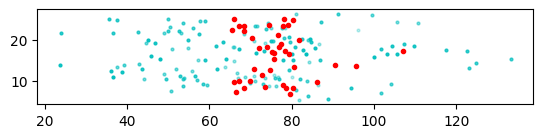

In [10]:
fig = plt.figure()
ax = fig.gca()
plot_gene('unc-42', data_set['7'], expression_all, ax=ax)